In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from os import path

         numThreads  numVerts         frame       startup
count  40001.000000   40001.0  40001.000000  40001.000000
mean       2.500037   11484.0      1.953638    154.804721
std        1.118059       0.0      2.503118     26.590511
min        1.000000   11484.0      1.264230    146.187000
25%        2.000000   11484.0      1.681360    149.266000
50%        3.000000   11484.0      1.799990    150.919000
75%        4.000000   11484.0      1.937640    153.082000
max        4.000000   11484.0    354.938000    578.477000
         numThreads  numVerts         frame       startup
count  39122.000000   39122.0  39122.000000  39122.000000
mean       2.533741   11484.0      1.895241    154.618981
std        1.107452       0.0      1.557115     26.437168
min        1.000000   11484.0      1.264230    146.187000
25%        2.000000   11484.0      1.679558    149.268000
50%        3.000000   11484.0      1.797435    150.919000
75%        4.000000   11484.0      1.932878    153.066000
max        4.0

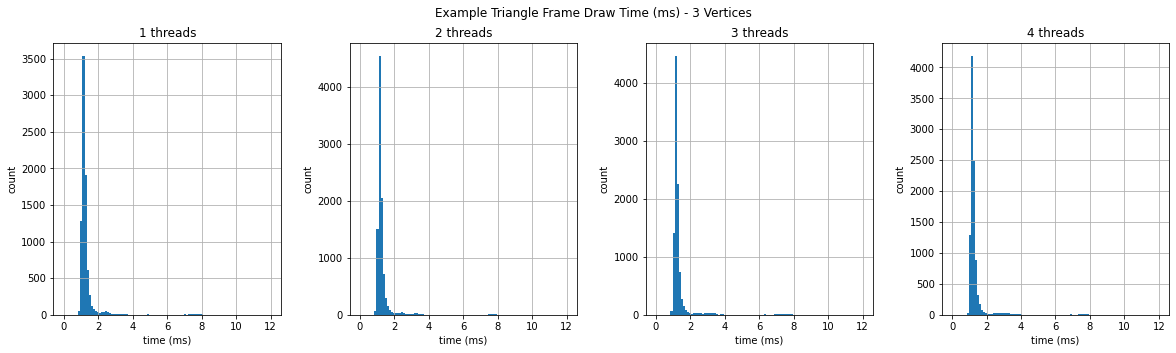

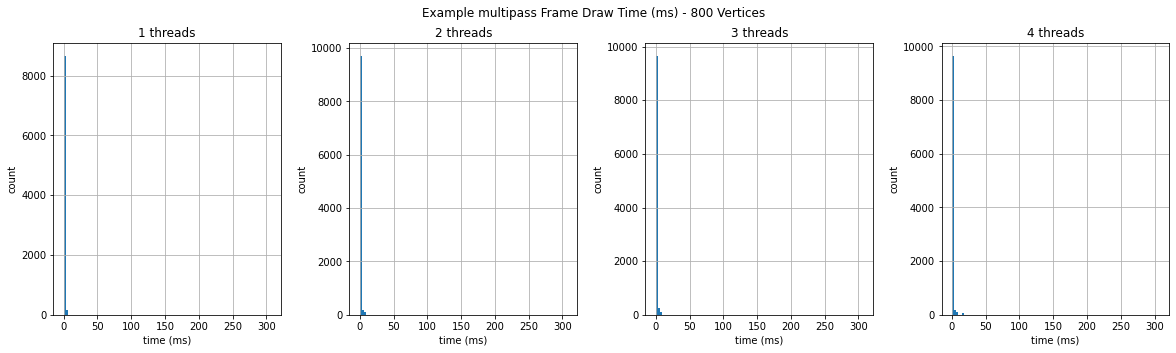

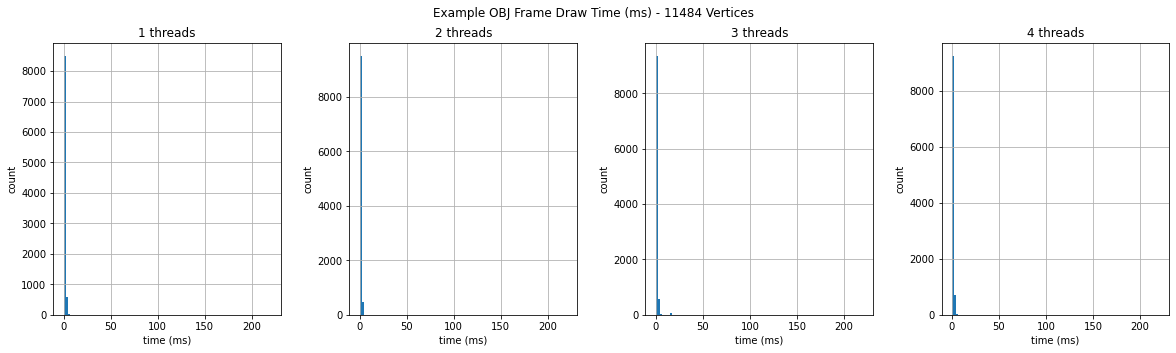

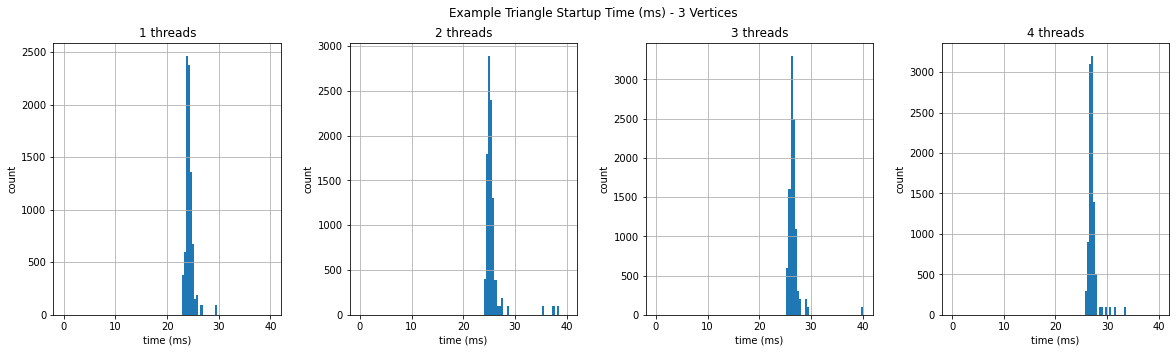

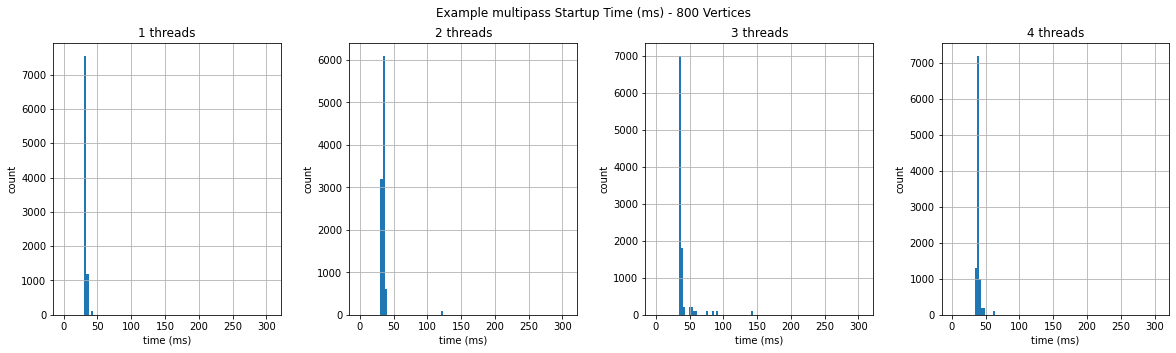

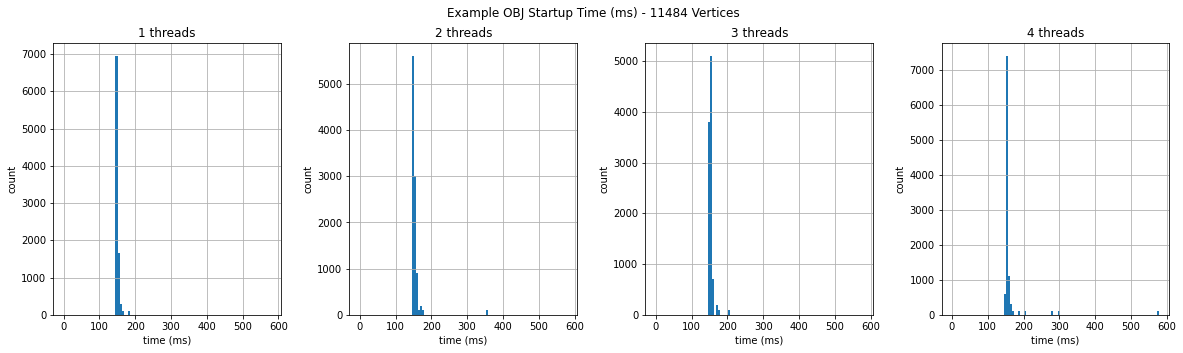

In [53]:
triangle = pd.read_csv("triangle.txt")
multipass = pd.read_csv("multipass.txt")
obj = pd.read_csv("obj.txt")

MAX_THREADS = 4

for df in [triangle, multipass, obj]:
    for i in range(1,MAX_THREADS+1):
        z=np.abs(stats.zscore(df.frame[df.numThreads==i]))
        df.drop(df.index[np.where(z>3)[0]], inplace=True)
        z=np.abs(stats.zscore(df.startup[df.numThreads==i]))
        df.drop(df.index[np.where(z>3)[0]], inplace=True)

def graph(df, n, title, subtitle, minimum=0, maximum=100):
    x_label='time (ms)'
    y_label='count'
    
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    fig.suptitle('Example {} {} Time (ms) - {} Vertices'.format(title, subtitle, df.numVerts.iloc[0]))
    for i in range(1,5):
        df[df.numThreads==i].hist(n,bins=100,ax=ax[i-1],range=[minimum,maximum])
        ax[i-1].set_xlabel(x_label)
        ax[i-1].set_ylabel(y_label)
        ax[i-1].set_title('{} threads'.format(i))
    plt.show()

graph(triangle,'frame', 'Triangle', 'Frame Draw', 0, triangle.frame.max())
graph(multipass, 'frame', 'multipass', 'Frame Draw', 0, multipass.frame.max())
graph(obj,'frame', 'OBJ', 'Frame Draw', 0, obj.frame.max())

graph(triangle,'startup', 'Triangle', 'Startup', 0, triangle.startup.max())
graph(multipass, 'startup', 'multipass', 'Startup', 0, multipass.frame.max())
graph(obj,'startup', 'OBJ', 'Startup', 0, obj.startup.max())